In [1]:
import h5py
import v1dd_physiology.data_fetching as daf
import matplotlib.pyplot as plt

In [2]:
# windows
base_folder = r"\\allen\programs\mindscope\workgroups\surround\v1dd_in_vivo_new_segmentation\data"

# # linux and mac
# base_folder = "/allen/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"

In [3]:
daf.get_all_sessions(database_path=base_folder)

['M409828_11',
 'M409828_12',
 'M409828_13',
 'M409828_14',
 'M409828_15',
 'M409828_16',
 'M409828_17',
 'M409828_18',
 'M409828_19',
 'M409828_1a',
 'M409828_1b',
 'M409828_1c',
 'M409828_1d',
 'M409828_1e',
 'M409828_1f',
 'M409828_21',
 'M409828_22',
 'M409828_23',
 'M409828_24',
 'M409828_25',
 'M409828_31',
 'M409828_32',
 'M409828_33',
 'M409828_34',
 'M409828_35',
 'M409828_41',
 'M409828_42',
 'M409828_43',
 'M409828_44',
 'M409828_45',
 'M409828_51',
 'M409828_52',
 'M409828_53',
 'M409828_54',
 'M409828_55',
 'M416296_11',
 'M416296_12',
 'M416296_13',
 'M416296_14',
 'M416296_15',
 'M416296_17',
 'M416296_18',
 'M416296_19',
 'M416296_1a',
 'M416296_1b',
 'M416296_1c',
 'M416296_21',
 'M416296_22',
 'M416296_23',
 'M416296_24',
 'M416296_25',
 'M416296_31',
 'M416296_32',
 'M416296_33',
 'M416296_34',
 'M416296_35',
 'M416296_41',
 'M416296_42',
 'M416296_43',
 'M416296_44',
 'M416296_45',
 'M416296_51',
 'M416296_52',
 'M416296_53',
 'M416296_54',
 'M416296_55',
 'M427836_

In [4]:
mouse_id = '409828'
col_id = '1'
vol_id = '3'

In [5]:
sess_id = f'M{mouse_id}_{col_id}{vol_id}'
sess_id

'M409828_13'

In [6]:
nwb_path = daf.get_nwb_path(session_id=sess_id, database_path=base_folder)
nwb_path

'\\\\allen\\programs\\mindscope\\workgroups\\surround\\v1dd_in_vivo_new_segmentation\\data\\nwbs\\M409828_13_20181213.nwb'

In [7]:
nwb_f = h5py.File(nwb_path, 'r')

In [8]:
sess_id = daf.get_session_id(nwb_f=nwb_f)
sess_id

'M409828_13'

In [9]:
daf.get_lims_session_id(nwb_f=nwb_f)

'794964451'

In [10]:
daf.get_scope_type(nwb_f=nwb_f)

'2p'

Text(0.5, 1.0, 'multi-photon map')

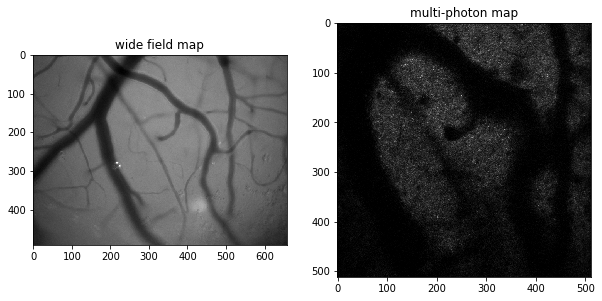

In [11]:
vasmap_wf = daf.get_vasculature_map(nwb_f=nwb_f, type='wf', is_standard=False)
vasmap_mp = daf.get_vasculature_map(nwb_f=nwb_f, type='mp', is_standard=False)

f, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axs[0].imshow(vasmap_wf, cmap='gray', interpolation='nearest')
axs[0].set_title('wide field map')
axs[1].imshow(vasmap_mp, cmap='gray', interpolation='nearest')
axs[1].set_title('multi-photon map')

Text(0.5, 1.0, 'multi-photon map, standard orientation')

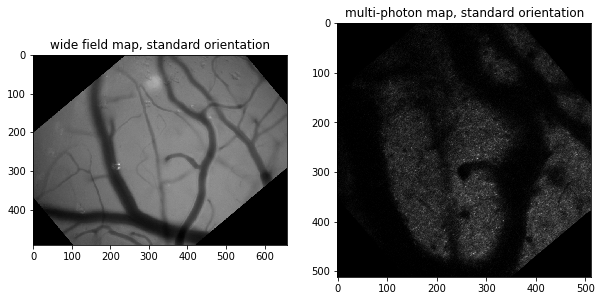

In [12]:
vasmap_wf = daf.get_vasculature_map(nwb_f=nwb_f, type='wf', is_standard=True)
vasmap_mp = daf.get_vasculature_map(nwb_f=nwb_f, type='mp', is_standard=True)

f, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axs[0].imshow(vasmap_wf, cmap='gray', interpolation='nearest')
axs[0].set_title('wide field map, standard orientation')
axs[1].imshow(vasmap_mp, cmap='gray', interpolation='nearest')
axs[1].set_title('multi-photon map, standard orientation')

In [13]:
plane_ns = daf.get_plane_names(nwb_f=nwb_f)
plane_ns

['plane0', 'plane1', 'plane2', 'plane3', 'plane4', 'plane5']

In [14]:
for plane_n in plane_ns:
    depth = daf.get_plane_depth(nwb_f=nwb_f, plane_n=plane_n)
    print(f'depth of {plane_n}: {depth} um')

depth of plane0: 242 um
depth of plane1: 258 um
depth of plane2: 274 um
depth of plane3: 290 um
depth of plane4: 306 um
depth of plane5: 322 um


In [15]:
plane_n = 'plane0'

In [16]:
exp_id = daf.get_lims_experiment_id(nwb_f=nwb_f, plane_n=plane_n)
exp_id

'795018590'

In [17]:
roi_ns = daf.get_roi_ns(nwb_f=nwb_f, plane_n=plane_n)
print(f'there are {len(roi_ns)} in {plane_n} of session: {sess_id}:')
print('\nfirst 100 roi names:\n')
print(roi_ns[0:100])

there are 1234 in plane0 of session: M409828_13:

first 100 roi names:

['roi_0000', 'roi_0001', 'roi_0002', 'roi_0003', 'roi_0004', 'roi_0005', 'roi_0006', 'roi_0007', 'roi_0008', 'roi_0009', 'roi_0010', 'roi_0011', 'roi_0012', 'roi_0013', 'roi_0014', 'roi_0015', 'roi_0016', 'roi_0017', 'roi_0018', 'roi_0019', 'roi_0020', 'roi_0021', 'roi_0022', 'roi_0023', 'roi_0024', 'roi_0025', 'roi_0026', 'roi_0027', 'roi_0028', 'roi_0029', 'roi_0030', 'roi_0031', 'roi_0032', 'roi_0033', 'roi_0034', 'roi_0035', 'roi_0036', 'roi_0037', 'roi_0038', 'roi_0039', 'roi_0040', 'roi_0041', 'roi_0042', 'roi_0043', 'roi_0044', 'roi_0045', 'roi_0046', 'roi_0047', 'roi_0048', 'roi_0049', 'roi_0050', 'roi_0051', 'roi_0052', 'roi_0053', 'roi_0054', 'roi_0055', 'roi_0056', 'roi_0057', 'roi_0058', 'roi_0059', 'roi_0060', 'roi_0061', 'roi_0062', 'roi_0063', 'roi_0064', 'roi_0065', 'roi_0066', 'roi_0067', 'roi_0068', 'roi_0069', 'roi_0070', 'roi_0071', 'roi_0072', 'roi_0073', 'roi_0074', 'roi_0075', 'roi_0076', 'ro

In [18]:
pika_roi_ids = daf.get_pika_roi_ids(nwb_f=nwb_f, plane_n=plane_n)
print('\npika roi ids of first 100 rois:\n')
print(pika_roi_ids[0:100])


pika roi ids of first 100 rois:

['795018590_0000', '795018590_0001', '795018590_0002', '795018590_0003', '795018590_0004', '795018590_0005', '795018590_0006', '795018590_0007', '795018590_0008', '795018590_0009', '795018590_0010', '795018590_0011', '795018590_0012', '795018590_0013', '795018590_0014', '795018590_0015', '795018590_0016', '795018590_0017', '795018590_0018', '795018590_0019', '795018590_0020', '795018590_0021', '795018590_0022', '795018590_0023', '795018590_0024', '795018590_0025', '795018590_0026', '795018590_0027', '795018590_0028', '795018590_0029', '795018590_0030', '795018590_0031', '795018590_0032', '795018590_0033', '795018590_0034', '795018590_0035', '795018590_0036', '795018590_0037', '795018590_0038', '795018590_0039', '795018590_0040', '795018590_0041', '795018590_0042', '795018590_0043', '795018590_0044', '795018590_0045', '795018590_0046', '795018590_0047', '795018590_0048', '795018590_0049', '795018590_0050', '795018590_0051', '795018590_0052', '795018590_